## <center>逻辑回归</center>

### sigmoid函数

In [2]:
import numpy as np
import matplotlib.pyplot as plt

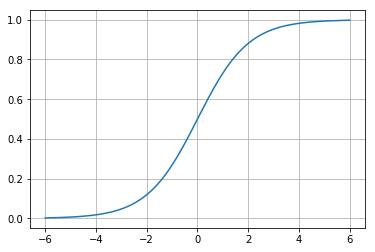

In [2]:
x=np.linspace(-6,6,1000)
y=[1/(1+np.exp(-i)) for i in x]
plt.plot(x,y)
plt.grid(True)

### 原理出发

In [3]:
data=np.loadtxt('logistic.txt')#直接变成numpy

In [4]:
m,n=np.shape(data)
X=np.ones((m,n))
X[:,:-1]=data[:,:-1]
X
y=data[:,-1]

def sigmoid(x):
    return 1/(1+np.exp(-x))

w=np.ones(n)
alpha=0.001
times=0
while times<100000:
    h=sigmoid(np.dot(X,w))
    wNew=w-alpha*np.dot(X.T,(h-y))
    if (abs(wNew-w)<0.000001).all():
        break
    else:
        w=wNew
    times+=1
print(w)

[ 1.25180727 -1.99917231 14.72593649]


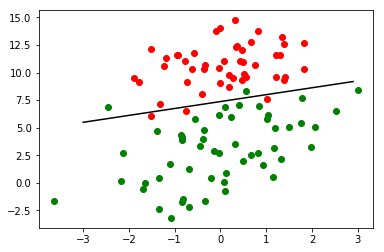

In [64]:
import matplotlib.pyplot as plt
pos=np.where(y==1)
neg=np.where(y==0)
plt.plot(X[pos,0],X[pos,1],'go')
plt.plot(X[neg,0],X[neg,1],'ro')
x=np.arange(-3,3,0.1)
y1=(-w[0]*x-w[2])/w[1]
plt.plot(x,y1,'k')

### sklearn：鸾尾花

In [59]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

https://www.cnblogs.com/feffery/p/8686128.html

In [61]:
X,y=load_iris(return_X_y=True)#参数return_X_y控制输出数据的结构，若选为True，则将因变量和自变量独立导出
clf=LogisticRegression().fit(X,y)
clf.predict(X[:2,:])
clf.predict_proba(X[:2,:])#查看前两个样本属于各个类别的概率
clf.score(X,y)

0.96

In [50]:
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [1]:
iris=datasets.load_iris()
X=iris.data[:,[2,3]]
y=iris.target
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=23)

sc=StandardScaler()
sc.fit(X_train)
X_train=sc.transform(X_train)
X_test=sc.transform(X_test)
X_combined=np.vstack((X_train,X_test))#沿着竖直方向将矩阵堆叠起来
y_combined=np.hstack((y_train,y_test))#沿着水平方向将数组堆叠起来
model=LogisticRegression()
model.fit(X_train,y_train)
model.predict_proba(X_test[0:1,:])

NameError: name 'datasets' is not defined

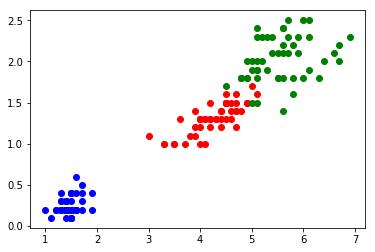

In [67]:
x1=[];y1=[]
x2=[];y2=[]
x3=[];y3=[]
for i in range(X.shape[0]):
    if y[i]==0:
        x1.append(X[i,2])
        y1.append(X[i,3])
    elif y[i]==1:
        x2.append(X[i,2])
        y2.append(X[i,3])
    else:
        x3.append(X[i,2])
        y3.append(X[i,3])
import matplotlib.pyplot as plt
plt.plot(x1,y1,'bo')
plt.plot(x2,y2,'ro')
plt.plot(x3,y3,'go')


### 案例实现根据用户行为实现是否购买

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
purchase = pd.read_csv("C:\\Users\\Administrator\\Desktop\\logistic_data.csv")
purchase.head()

In [ ]:
dummy = pd.get_dummies(purchase.Gender)
dummy.head()

In [ ]:
# 为防止多重共线性，将哑变量中的Female删除
dummy_drop = dummy.drop('Female', axis = 1)#把female列删除
dummy_drop.head()

In [ ]:
purchase = purchase.drop(['User ID','Gender'], axis = 1)

In [ ]:
model_data = pd.concat([dummy_drop,purchase], axis = 1)
X = model_data.drop('Purchased', axis = 1)
y = model_data['Purchased']
X.head()

In [ ]:
model_data['Purchased'].value_counts()

In [ ]:
from sklearn import linear_model

In [ ]:
clf=linear_model.LogisticRegression()
clf.fit(X,y)

In [ ]:
clf.coef_

In [ ]:
clf.score(X)